
# **Financial Portfolio Analysis**

This notebook analyzes and visualizes a financial portfolio dataset containing various asset types tracked over time. Using Python libraries such as pandas, matplotlib, and numpy, we will explore the data and create animations to illustrate portfolio trends.

In [ ]:
!apt-get -y install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


# **Import Libraries**

Import the necessary python libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import dates as mdates
from IPython.display import HTML
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec

# **load Dataset**

uplod financial_portfolio_data.csv file and extract the asset from the 'Asset column.

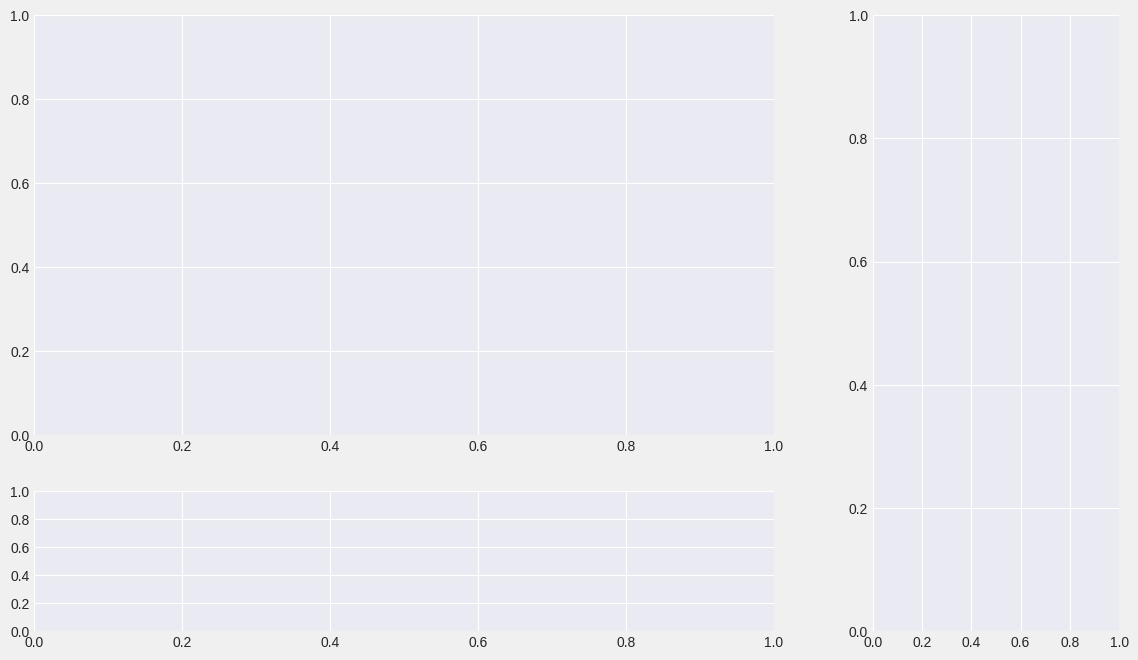

In [ ]:
df = pd.read_csv('/content/financial_portfolio_data.csv', parse_dates=['Date'])
df['AssetType'] = df['Asset'].str.extract(r'([A-Za-z]+)')[0]


daily_prices = df.groupby(['Date', 'AssetType'])['Price'].mean().unstack()
daily_prices = daily_prices.ffill()
daily_prices = daily_prices.fillna(0)


rolling_7d = daily_prices.rolling(7, min_periods=1).mean()
rolling_30d = daily_prices.rolling(30, min_periods=1).mean()


plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(14, 8), facecolor='#f0f0f0')
gs = GridSpec(2, 2, figure=fig, height_ratios=[3, 1], width_ratios=[3, 1])

ax_main = fig.add_subplot(gs[0, 0])
ax_vol = fig.add_subplot(gs[1, 0])
ax_pie = fig.add_subplot(gs[:, 1])

In [ ]:
colors = {
    'Stock': '#4E79A7',
    'Bond': '#59A14F',
    'Commodity': '#E15759'
}


main_lines = []
ma7_lines = []
ma30_lines = []
vol_bars = []


date_label = ax_main.text(0.02, 0.95, '', transform=ax_main.transAxes,
                        fontsize=12, bbox=dict(facecolor='white', alpha=0.9))


ax_main.set_ylabel('Price ($)', fontsize=12)
ax_main.set_title('Portfolio Performance with Moving Averages', fontsize=14, pad=20)
ax_main.xaxis.set_major_locator(mdates.MonthLocator())
ax_main.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax_main.grid(True, alpha=0.3)

ax_vol.set_xlabel('Date', fontsize=12)
ax_vol.set_ylabel('Daily Updates', fontsize=10)
ax_vol.xaxis.set_major_locator(mdates.MonthLocator())

# **Group and Summarize Data**


We aggregate the portfolio data by asset and date to analyze value trends over time.

In [ ]:
def animate(i):
    current_date = daily_prices.index[i]
    window = daily_prices.index[max(0, i-90):i+1]


    for line in main_lines + ma7_lines + ma30_lines:
        line.remove()
    for bar in vol_bars:
        bar.remove()

    main_lines.clear()
    ma7_lines.clear()
    ma30_lines.clear()
    vol_bars.clear()


    for asset in expected_assets:

        line, = ax_main.plot(window, daily_prices[asset][window],
                           color=colors[asset], lw=2.5, alpha=0.8, label=asset)
        main_lines.append(line)


        line, = ax_main.plot(window, rolling_7d[asset][window],
                           color=colors[asset], lw=1, alpha=0.3, ls='--')
        ma7_lines.append(line)


        line, = ax_main.plot(window, rolling_30d[asset][window],
                           color=colors[asset], lw=1.5, alpha=0.5)
        ma30_lines.append(line)


    daily_counts = df[df['Date'] <= current_date].groupby(['Date', 'AssetType']).size().unstack().fillna(0)
    bottom = None
    for asset in expected_assets:
        if asset in daily_counts.columns:
            bars = ax_vol.bar(daily_counts.index, daily_counts[asset],
                             color=colors[asset], bottom=bottom, alpha=0.7, width=1)
            vol_bars.extend(bars)
            bottom = daily_counts[asset] if bottom is None else bottom + daily_counts[asset]


    ax_pie.clear()
    try:
        current_values = daily_prices.loc[current_date]
        ax_pie.pie(current_values, labels=current_values.index,
                  colors=[colors[a] for a in current_values.index],
                  autopct='%1.1f%%', startangle=90)
        ax_pie.set_title(f'Allocation on {current_date.strftime("%b %d")}', fontsize=12)
    except Exception as e:
        print(f"Error updating pie chart: {e}")


    date_label.set_text(current_date.strftime('%B %d, %Y'))


    ax_main.relim()
    ax_main.autoscale_view()
    ax_vol.set_xlim(window[0], window[-1])
    ax_vol.set_ylim(0, max(1, daily_counts.sum(axis=1).max() * 1.1))

    return main_lines + ma7_lines + ma30_lines + vol_bars + ax_pie.patches + [date_label]


# **Create Animated Bar Chart**

using matplotlib.animation to create a bar chart

In [ ]:
ani = animation.FuncAnimation(
    fig, animate, frames=min(200, len(daily_prices)),  # Limit to 200 frames
    interval=100, blit=False, repeat_delay=2000
)


plt.rcParams['animation.embed_limit'] = 100  # 100MB limit
plt.tight_layout()
plt.close()

# **Display the Animation**

Finally, we render the animation to visualize asset performance dynamically.

In [ ]:
HTML(ani.to_jshtml())
